# Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install squarify


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

df = pd.read_csv('/content/drive/MyDrive/Nguyen_Khanh_Hung_RFM_project/ecommerce_retail.csv', encoding='unicode_escape', parse_dates=['InvoiceDate'])
seg = pd.read_csv('/content/drive/MyDrive/Nguyen_Khanh_Hung_RFM_project/segmentation.csv', encoding='unicode_escape')
df.info()
df.head(10)
seg.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


# EDA

## Xóa duplicated

In [ ]:
df = df.drop_duplicates()
print(df.head())
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------  

## Xóa dữ liệu trống cột customerID

Ta cần phân nhóm khách hàng nên ta sẽ xóa những dòng nào customerID trống

In [ ]:
df = df.dropna(subset=['CustomerID'])
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  401604.000000                         401604  401604.000000   
mean       12.183273  2011-07-10 12:08:23.848567552       3.474064   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000        

## Chang datatype and add column year-week

In [ ]:
df['CustomerID'] = df['CustomerID'].astype("int")
df['InvoiceNo'] = df['InvoiceNo'].astype("string")
df['StockCode'] = df['StockCode'].astype("string")
df['Country'] = df['Country'].astype("string")

# Tao cột total_bill
df['Sale'] = df['UnitPrice'] * df['Quantity']
print(df.head())
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country   Sale  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  20.34  
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  

## filter united kingdom, unit_price và quantity > 0

In [ ]:
positive_quantity = df['Quantity'] > 0
positive_unit_price = df['UnitPrice'] > 0
uk_country = df['Country'] == "United Kingdom"
df_filtered = df[positive_quantity & positive_unit_price & uk_country]
df_filtered

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,214.80


# Tính điểm, phân loại

## Tính điểm

### Tính điểm cho recency

In [ ]:
# Tạo bảng cho recency
df_recency = df_filtered.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_recency['Recency'] = (df_recency['InvoiceDate'].max() - df_recency['InvoiceDate']).dt.days

# Tạo điểm quantile
twentieth = df_recency['Recency'].quantile(0.2)
fortieth = df_recency['Recency'].quantile(0.4)
sixtieth = df_recency['Recency'].quantile(0.6)
eightieth = df_recency['Recency'].quantile(0.8)
maximum = df_recency['Recency'].max()

# labels and bins
points_label = ['5', '4', '3', '2', '1']
bins = [-1, twentieth, fortieth, sixtieth, eightieth, maximum + 1]

df_recency['recency_score'] = (pd.cut(df_recency['Recency'], labels=points_label, bins=bins)).astype("string")
print(df_recency.sort_values('Recency'))


      CustomerID         InvoiceDate  Recency recency_score
1794       15344 2011-12-09 10:45:00        0             5
3315       17451 2011-12-08 15:02:00        0             5
1275       14621 2011-12-08 16:22:00        0             5
1267       14606 2011-12-08 19:28:00        0             5
2564       16401 2011-12-08 18:15:00        0             5
...          ...                 ...      ...           ...
3690       17968 2010-12-01 12:23:00      373             1
3762       18074 2010-12-01 09:53:00      373             1
3646       17908 2010-12-01 11:45:00      373             1
661        13747 2010-12-01 10:37:00      373             1
1354       14729 2010-12-01 12:43:00      373             1

[3920 rows x 4 columns]


### Tính điểm cho frequency

In [ ]:
# Tạo bảng cho frequency
df_frequency = df_filtered.groupby('CustomerID')['InvoiceDate'].count().reset_index()
df_frequency.columns = ['CustomerID', 'frequency']

# Tạo điểm quantile
twentieth = df_frequency['frequency'].quantile(0.2)
fortieth = df_frequency['frequency'].quantile(0.4)
sixtieth = df_frequency['frequency'].quantile(0.6)
eightieth = df_frequency['frequency'].quantile(0.8)
maximum = df_frequency['frequency'].max()

# # labels and bins
points_label = ['1', '2', '3', '4', '5']
bins = [0, twentieth, fortieth, sixtieth, eightieth, maximum]

df_frequency['frequency_score'] = (pd.cut(df_frequency['frequency'], labels=points_label, bins=bins)).astype("string")
print(df_frequency)


      CustomerID  frequency frequency_score
0          12346          1               1
1          12747        103               4
2          12748       4412               5
3          12749        199               5
4          12820         59               4
...          ...        ...             ...
3915       18280         10               1
3916       18281          7               1
3917       18282         12               1
3918       18283        721               5
3919       18287         70               4

[3920 rows x 3 columns]


### Tính điểm cho monetary

In [ ]:
# Tạo bảng cho monetary
df_monetary = df_filtered.groupby('CustomerID')['Sale'].sum().reset_index()

# Tạo điểm quantile
twentieth = df_monetary['Sale'].quantile(0.2)
fortieth = df_monetary['Sale'].quantile(0.4)
sixtieth = df_monetary['Sale'].quantile(0.6)
eightieth = df_monetary['Sale'].quantile(0.8)
maximum = df_monetary['Sale'].max()

# labels and bins
points_label = ['1', '2', '3', '4', '5']
bins = [0, twentieth, fortieth, sixtieth, eightieth, maximum]

df_monetary['monetary_score'] = (pd.cut(df_monetary['Sale'], labels=points_label, bins=bins)).astype("string")
print(df_monetary.sort_values('Sale'))

      CustomerID       Sale monetary_score
2807       16738       3.75              1
1398       14792       6.20              1
2604       16454       6.90              1
3680       17956      12.75              1
2913       16878      13.30              1
...          ...        ...            ...
2294       16029   80850.84              5
3356       17511   91062.38              5
2598       16446  168472.50              5
3314       17450  194390.79              5
3783       18102  259657.30              5

[3920 rows x 3 columns]


## Segmentaion

### Merge các điểm để phân loại

In [ ]:
# merge cac diem lai
df_merge = df_recency.merge(df_frequency, on='CustomerID').merge(df_monetary, on='CustomerID')
df_merge['RFM_score'] = df_merge['recency_score'] + df_merge['frequency_score'] + df_merge['monetary_score']
user_score = df_merge[['CustomerID', 'Recency', 'frequency', 'Sale', 'recency_score', 'frequency_score', 'monetary_score', 'RFM_score']]
print(user_score)
user_score.info()

      CustomerID  Recency  frequency      Sale recency_score frequency_score  \
0          12346      325          1  77183.60             1               1   
1          12747        1        103   4196.01             5               4   
2          12748        0       4412  33053.19             5               5   
3          12749        3        199   4090.88             5               5   
4          12820        2         59    942.34             5               4   
...          ...      ...        ...       ...           ...             ...   
3915       18280      277         10    180.60             1               1   
3916       18281      180          7     80.82             1               1   
3917       18282        7         12    178.05             5               1   
3918       18283        3        721   2045.53             5               5   
3919       18287       42         70   1837.28             3               4   

     monetary_score RFM_score  
0      

### Phân loại

In [ ]:
# convert comma-separated string to a list of rfm scores
seg.columns = ['Segment', 'RFM_score']
seg['RFM_score'] = seg['RFM_score'].str.split(',')

# transform each element of a list-like to a row
seg = seg.explode('RFM_score').reset_index(drop=True)

# chang type
seg['RFM_score'] = seg['RFM_score'].astype("string")
# seg['Segment'] = seg['Segment'].astype("string")
seg['RFM_score'] = seg['RFM_score'].str.strip()

# merge 2 bang voi nhau
user_categ_merge = user_score.merge(seg, on='RFM_score')

print(user_categ_merge)
print(user_categ_merge.info())

      CustomerID  Recency  frequency      Sale recency_score frequency_score  \
0          12346      325          1  77183.60             1               1   
1          12747        1        103   4196.01             5               4   
2          12748        0       4412  33053.19             5               5   
3          12749        3        199   4090.88             5               5   
4          12820        2         59    942.34             5               4   
...          ...      ...        ...       ...           ...             ...   
3915       18280      277         10    180.60             1               1   
3916       18281      180          7     80.82             1               1   
3917       18282        7         12    178.05             5               1   
3918       18283        3        721   2045.53             5               5   
3919       18287       42         70   1837.28             3               4   

     monetary_score RFM_score          

# Visualization

## Distribution of Recency, Frequency, Monetary

<ipython-input-130-f90d898d8bbd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_categ_merge[col])


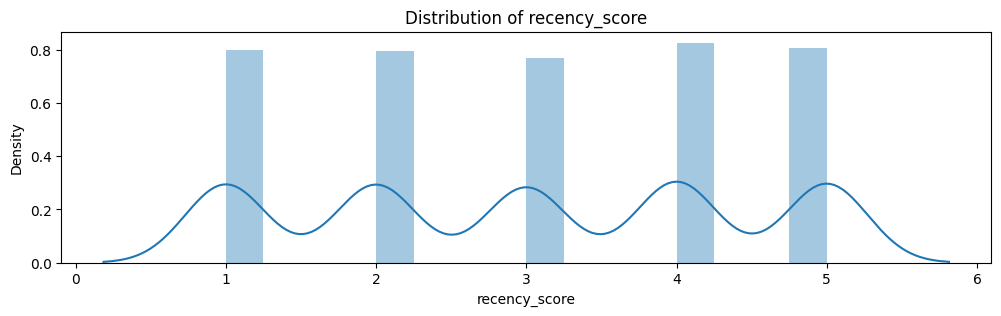

<ipython-input-130-f90d898d8bbd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_categ_merge[col])


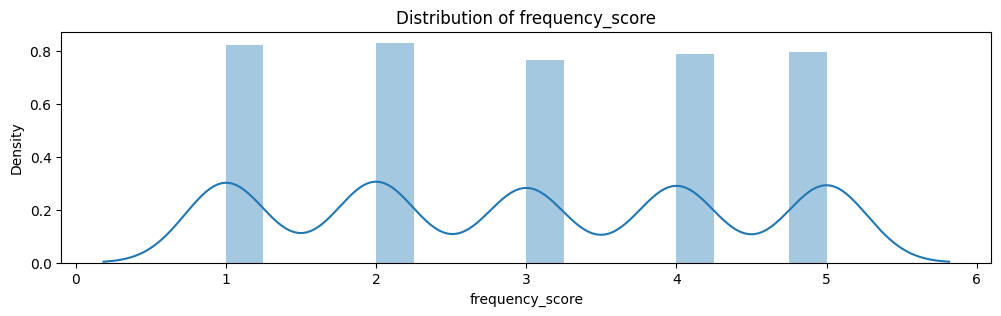

<ipython-input-130-f90d898d8bbd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_categ_merge[col])


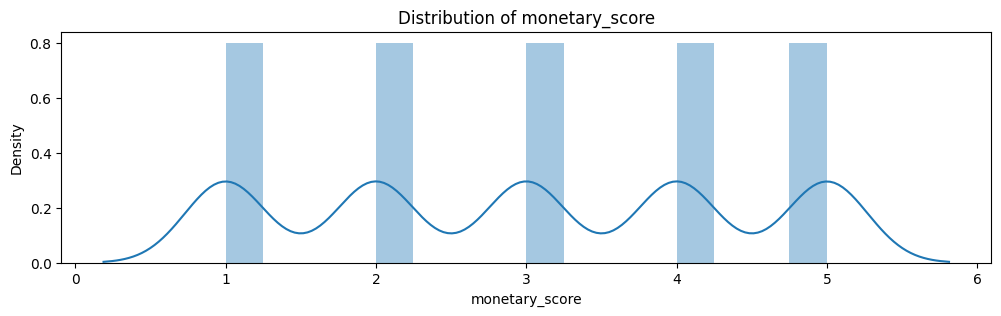

In [ ]:
# show distribution of each variable of the model
colnames = ['recency_score', 'frequency_score', 'monetary_score']

for col in colnames:
  fig, ax = plt.subplots(figsize=(12,3))
  sns.distplot(user_categ_merge[col])
  ax.set_title(f"Distribution of {col}")
  plt.show()

## Customer distibution of segmentation

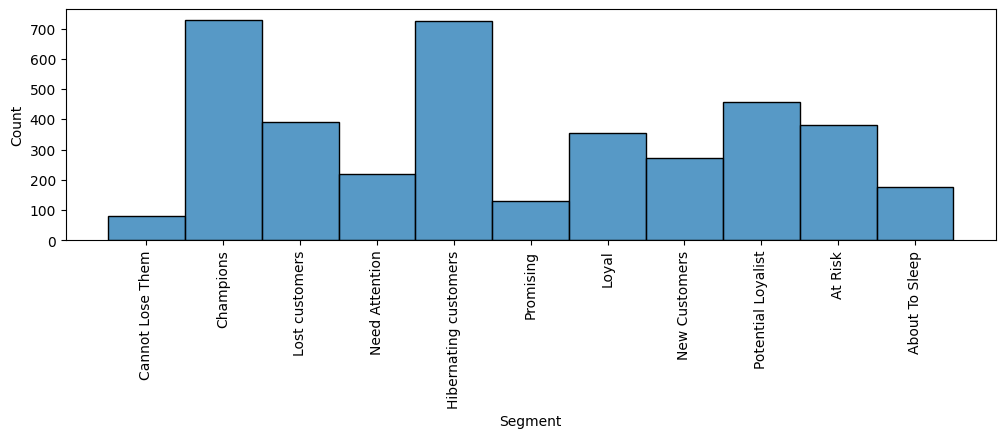

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
sns.histplot(user_categ_merge["Segment"])
plt.xticks(rotation=90)
plt.show()

## Segment by customer, segmet by total sales

In [ ]:
# Tinh Cust_count
user_categ_merge['Cust_count'] = 1
grp = user_categ_merge.groupby('Segment')[['Cust_count', 'Sale']].sum().reset_index()

total_sale = grp['Sale'].sum()
total_custo = grp['Cust_count'].sum()
grp['Count_share'] = grp['Cust_count'] / total_custo
grp['Sale_share'] = grp['Sale'] / total_sale
print(grp)


                  Segment  Cust_count         Sale  Count_share  Sale_share
0          About To Sleep         176    50660.380     0.044898    0.006954
1                 At Risk         383   541594.780     0.097704    0.074344
2        Cannot Lose Them          81   279409.201     0.020663    0.038354
3               Champions         727  4341648.390     0.185459    0.595969
4   Hibernating customers         725   277410.062     0.184949    0.038079
5          Lost customers         392    67515.820     0.100000    0.009268
6                   Loyal         355   793997.060     0.090561    0.108990
7          Need Attention         221   309128.280     0.056378    0.042433
8           New Customers         272    53869.650     0.069388    0.007395
9      Potential Loyalist         458   254032.191     0.116837    0.034870
10              Promising         130   315758.830     0.033163    0.043344


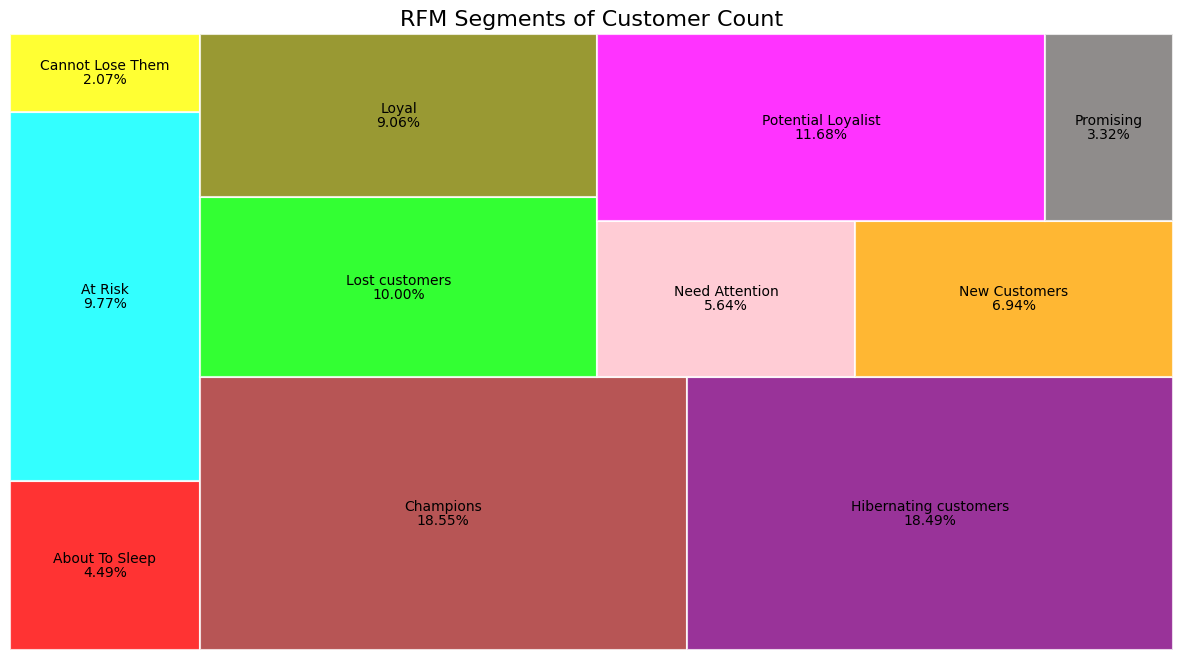

In [ ]:
# treemap
colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800080', '#00FF00', '#808000', '#FFC0CB', '#FFA500', '#FF00FF', '#736F6E']

fig, ax = plt.subplots(1, figsize=(15, 8))

# Size: số lượng khách hàng; %: phần trăm doanh thu trên tổng doanh thu
squarify.plot(sizes=grp['Cust_count'],
              label=grp['Segment'],
              value=[f'{x*100:.2f}%' for x in grp['Count_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
              )
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()


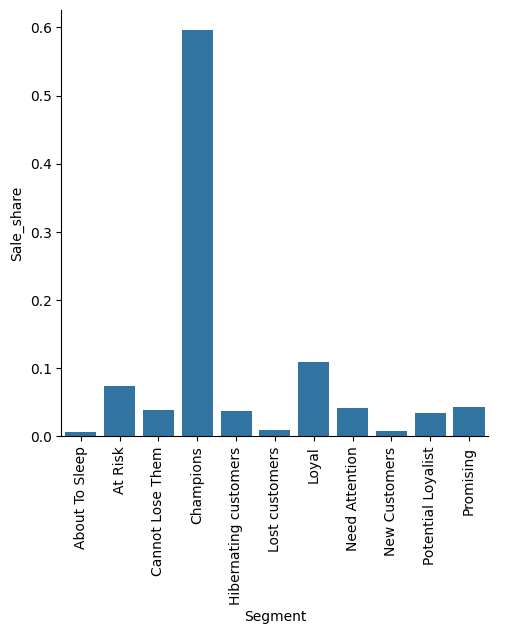

In [ ]:
# Sale per segmet bar chart
sns.catplot(x=grp['Segment'], y= grp['Sale_share'], kind="bar")
plt.xticks(rotation=90)
plt.show()